# 

In [100]:
#IMPORT REQUIRED LIBRARIES
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf 

In [101]:
#READ  DATASET
df = pd.read_csv('survey.csv')

In [102]:
#DATASET HEAD
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [103]:
#GET DATASET INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [104]:
#CHECK THE NUMBER OF NULLS IN THE DATASET 
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [105]:
#MORE DETAILS OF THE DATASET WITH DESCRIBE METHOD
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


<AxesSubplot:>

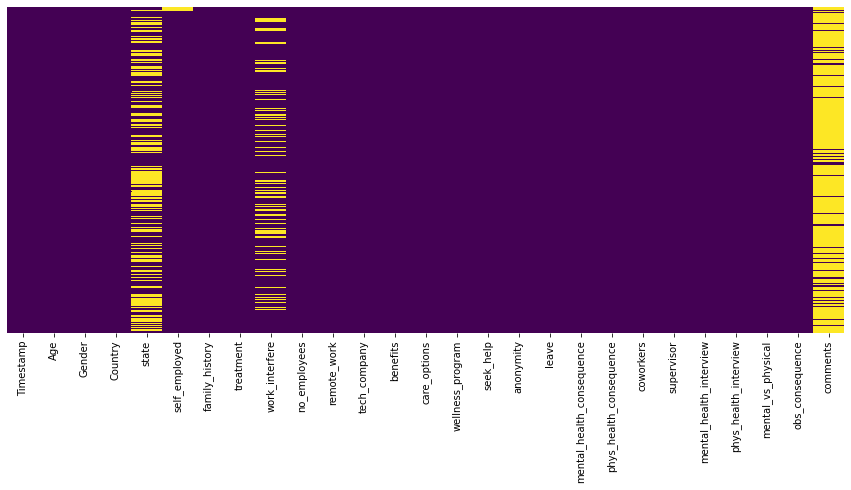

In [106]:
#VISUALIZATION OF NULLS IN THE DATASET WITH HEATMAP
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
df.drop('Timestamp',axis=1,inplace=True)
df.drop('state',axis=1,inplace=True)
df.drop('comments',axis=1,inplace=True)

In [108]:
# HANDLE ALL NULL VALUES
df.work_interfere.fillna(df.work_interfere.mode()[0], inplace=True)
df.self_employed.fillna(df.self_employed.mode()[0], inplace=True)


<AxesSubplot:>

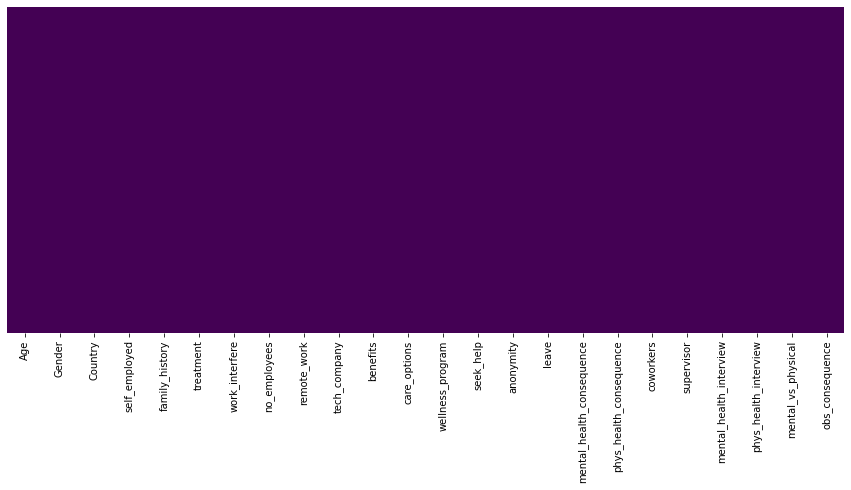

In [109]:
#VISUALIZATION OF NULLS IN THE DATASET WITH HEATMAP
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [110]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Man                                                 2
Cis Male                                            2
Female                                              2
Female (trans)                                      2
Malr                                                1
Femake                                              1
cis-female/femme                                    1
woman                       

In [111]:
#CATEGORISE THE GENDER

df["Gender"].replace(
    [
        "A little about you",
        "Agender",
        "All",
        "Androgyne",
        "Enby",
        "non-binary",
        "Nah",
        "something kinda male?",
        "p",
        "ostensibly male, unsure what that really means",
        "Genderqueer",
        "queer/she/they",
        "Neuter",
        "Trans woman",
        "Trans-female",
        "queer",
        "fluid",
        "fluid",
        "male leaning androgynous",
        "Female (trans)",
        "Guy (-ish) ^_^",
    ],
    "Nonbinary",
    inplace=True,
)

df["Gender"].replace(
    [
        "Cis Female",
        "F",
        "Femake",
        "Female ",
        "Female (cis)",
        "Woman",
        "femail",
        "female",
        "woman",
        "cis-female/femme",
        "f",
    ],
    "Female",
    inplace=True,
)

df["Gender"].replace(
    [
        "Cis Male",
        "Cis Man",
        "M",
        "Mail",
        "Make",
        "Mal",
        "Male ",
        "Male (CIS)",
        "Male-ish",
        "Man",
        "m",
        "cis male",
        "maile",
        "male",
        "msle",
        "Malr",
    ],
    "Male",
    inplace=True,
)
df.Gender.value_counts()

Male         991
Female       247
Nonbinary     21
Name: Gender, dtype: int64

In [112]:


one_hot_encoding_features=["self_employed",
    "family_history",
    "work_interfere",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_vs_physical",
    "mental_health_interview",
    "phys_health_interview",
    "obs_consequence",
    "Gender",];


      


In [113]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
#ENCODE CATEGORICAL DATA 
for feature in one_hot_encoding_features:
    one_hot_encoder = OneHotEncoder(handle_unknown="error");
    encoded_data = one_hot_encoder.fit_transform(df[[feature]]);
    for index , unique_data in enumerate(df[feature].unique()):
        if(type(unique_data) == str):
            unique_data = unique_data.lower().replace(" ", "_");
        else:
             unique_data = unique_data
            
        col_name=  feature  +"_"+ "% s" %unique_data;
        encoded_data_array = encoded_data.toarray()
        df[col_name]=encoded_data_array[:,index]
        
    df.drop(feature,axis=1,inplace=True);

In [114]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["Country","no_employees"]])
df[["Country","no_employees"]] = enc.transform(df[["Country","no_employees"]])

In [115]:
df.head(10)

,Age,Country,treatment,no_employees,self_employed_no,self_employed_yes,family_history_no,family_history_yes,work_interfere_often,work_interfere_rarely,...,mental_health_interview_yes,mental_health_interview_maybe,phys_health_interview_maybe,phys_health_interview_no,phys_health_interview_yes,obs_consequence_no,obs_consequence_yes,Gender_female,Gender_male,Gender_nonbinary
0,37,45.0,Yes,4.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,44,45.0,No,5.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,7.0,No,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,31,44.0,Yes,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31,45.0,No,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,33,45.0,No,4.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,35,45.0,Yes,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7,39,7.0,No,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,42,45.0,Yes,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,23,7.0,No,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


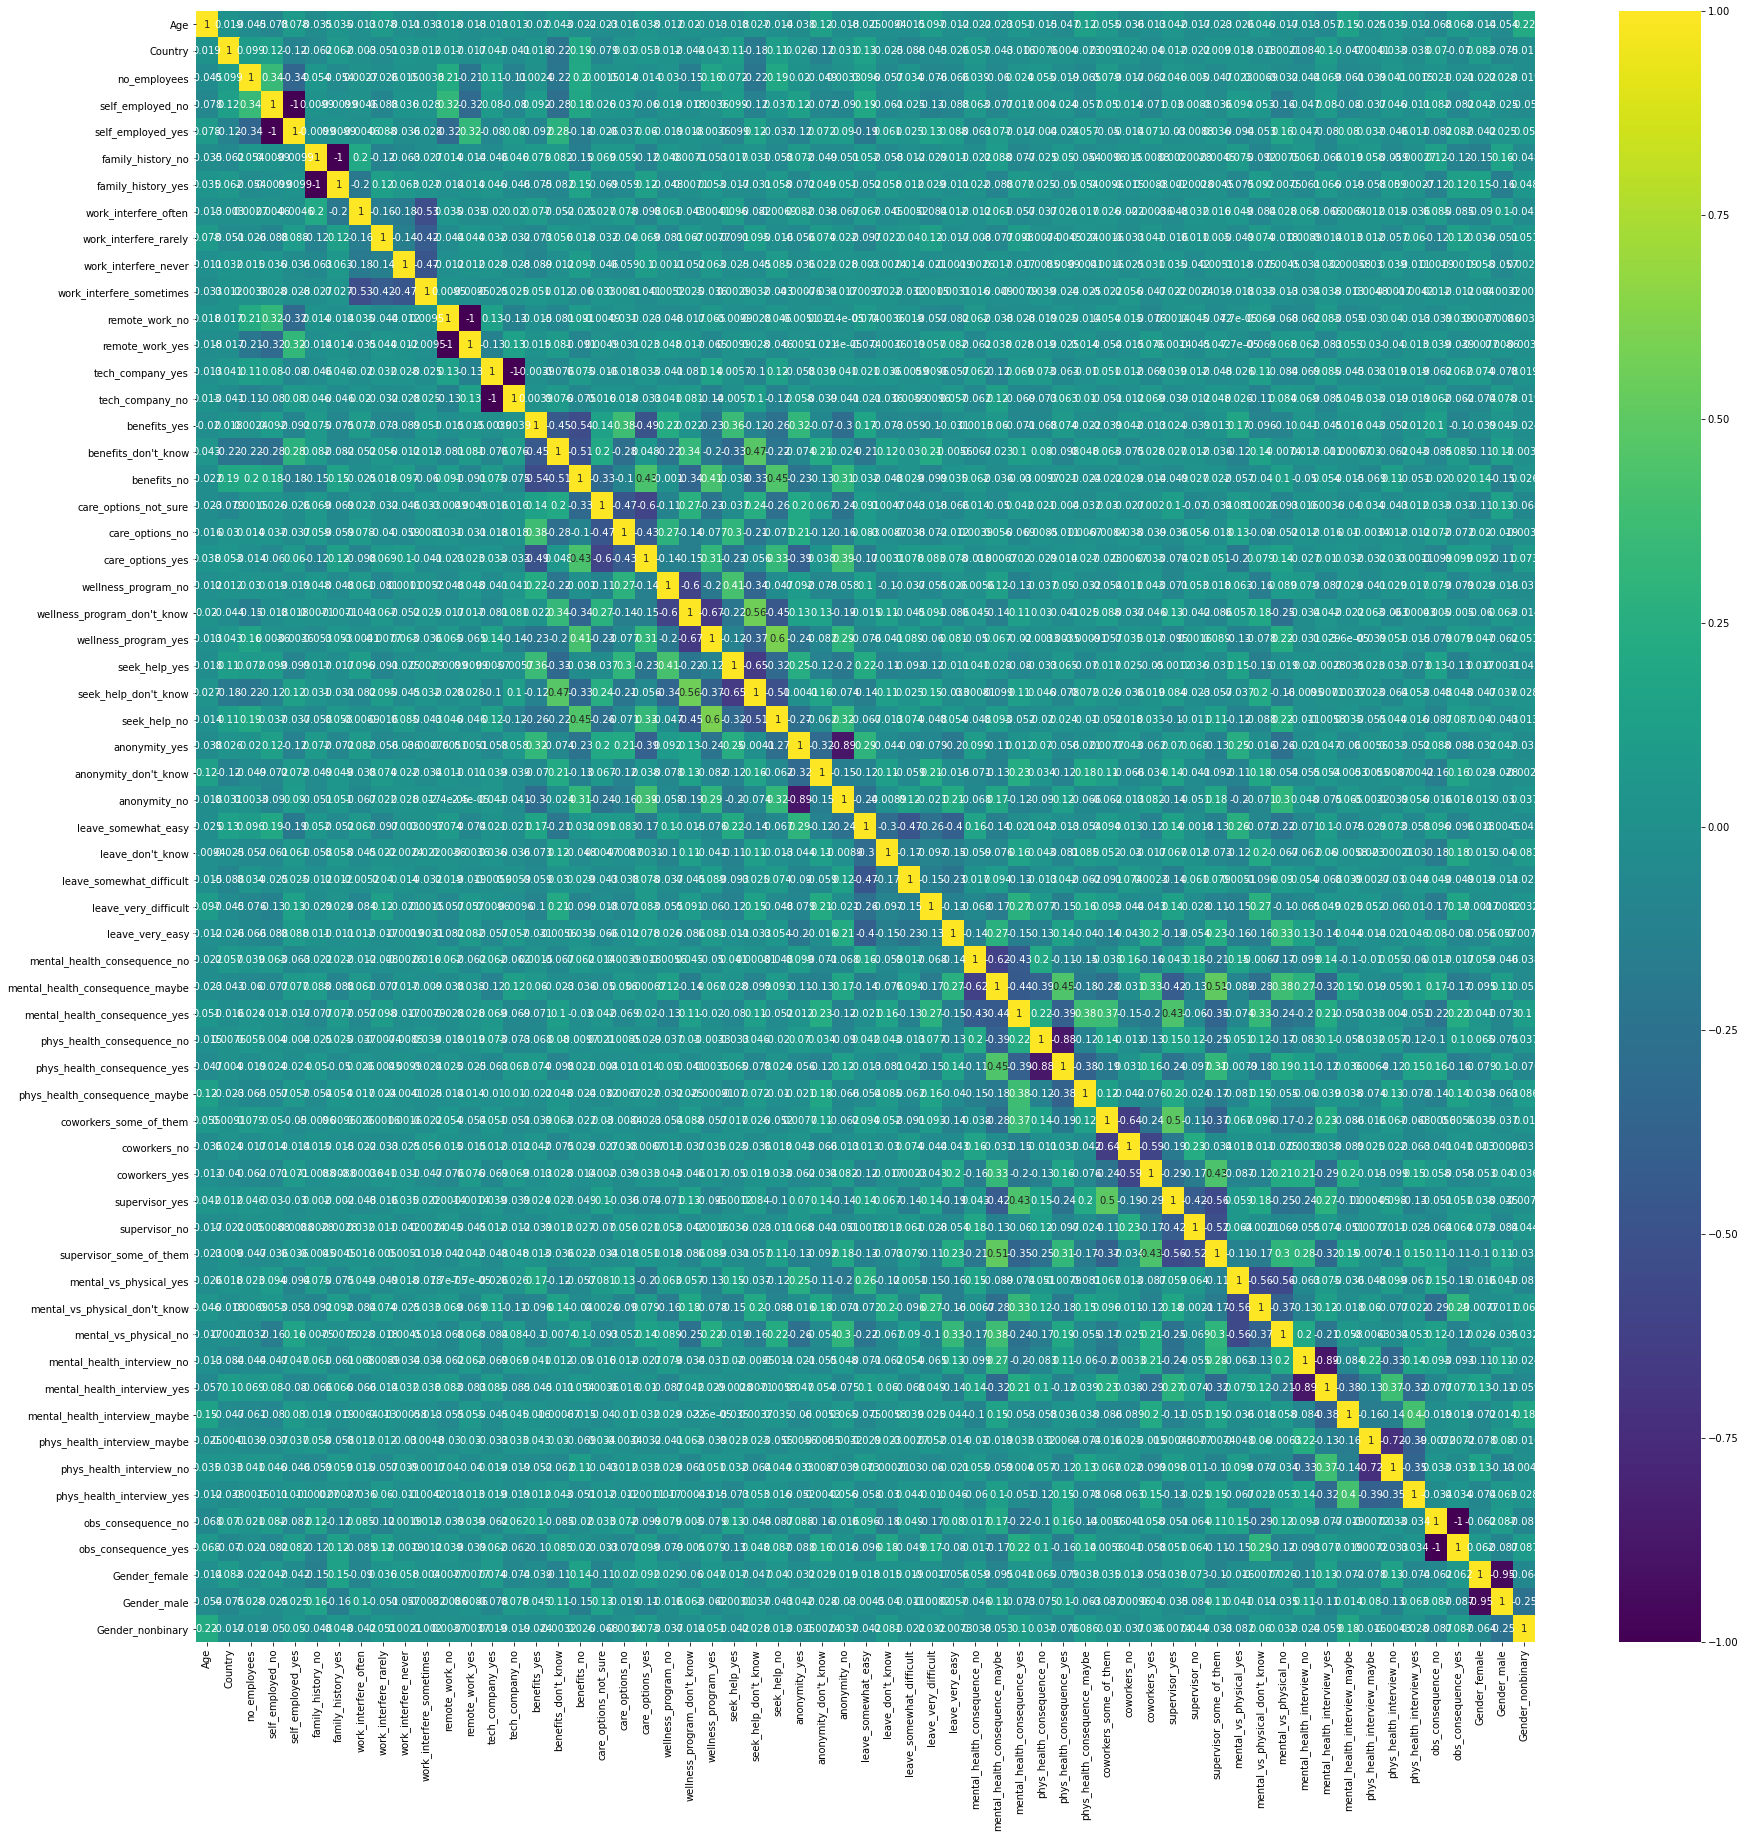

In [116]:
#PLOT CORRELATION MATRICS
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap="viridis",annot=True);

<AxesSubplot:xlabel='Age', ylabel='count'>

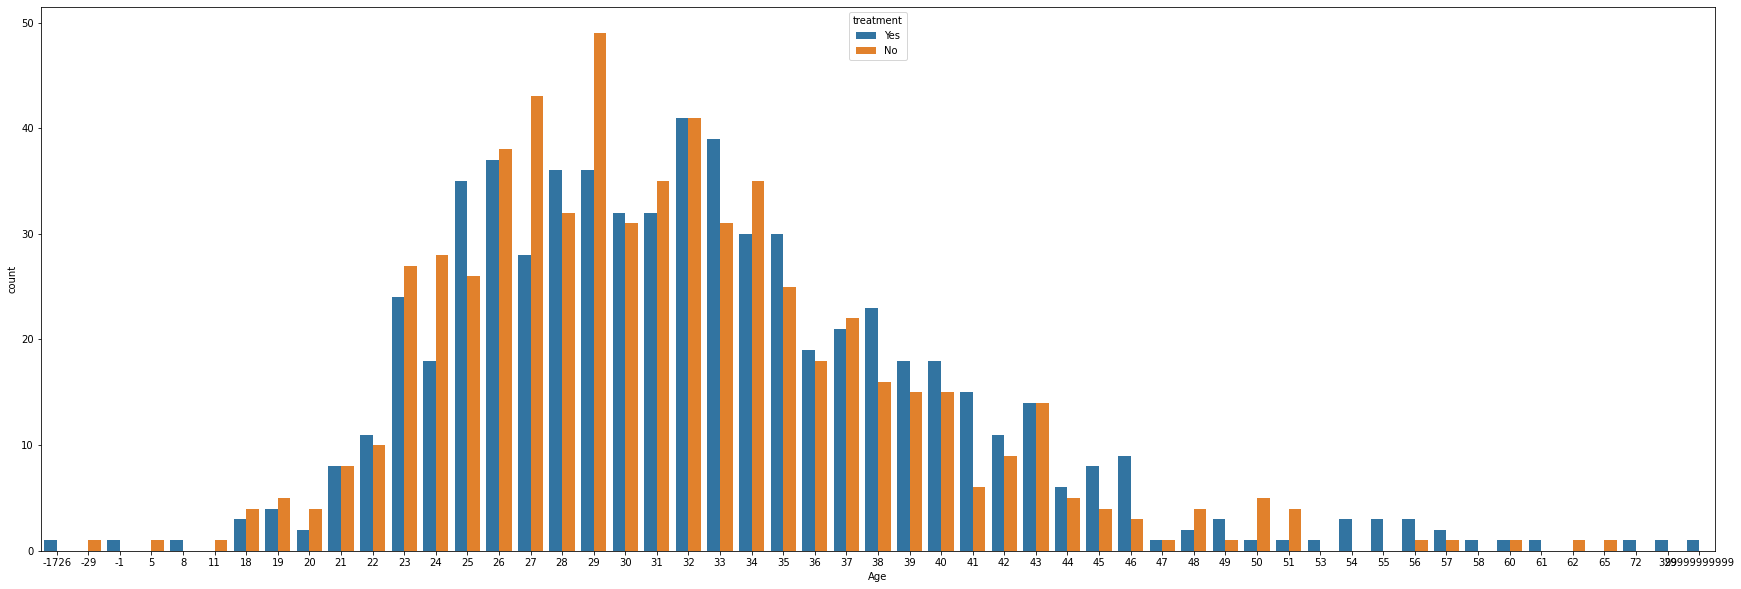

In [118]:
plt.figure(figsize=(30,10))
sns.countplot(data=df,x="Age",hue="treatment")

In [119]:
#HANDLE AGE OUTLIERS
df["Age"] = df["Age"].abs()
assert len(df[df["Age"] < 0]) == 0
indeces_list = df.index[df["Age"] > 100].tolist()
df = df.drop(indeces_list)
df.Age.describe()

count    1256.000000
mean       31.992038
std         7.421403
min         1.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

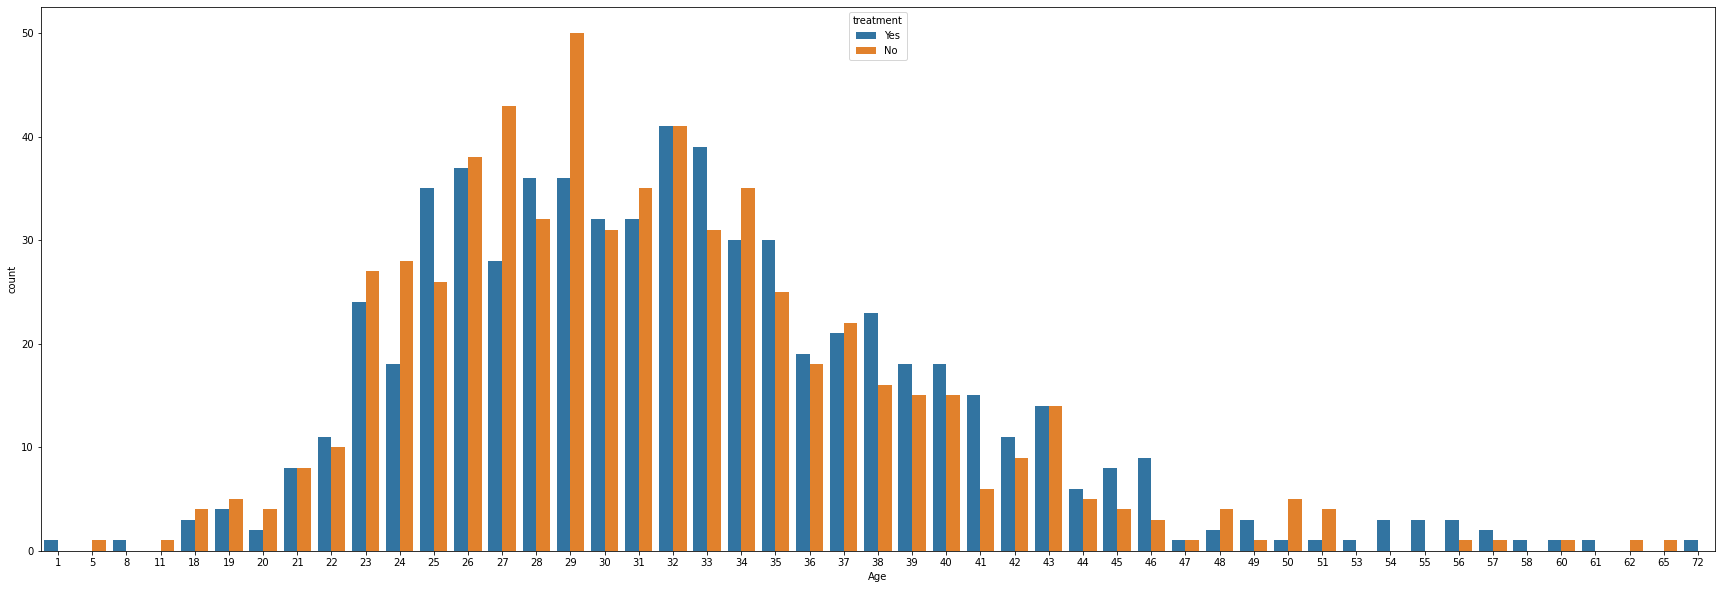

In [120]:
plt.figure(figsize=(30,10))
sns.countplot(data=df,x="Age",hue="treatment")

In [121]:
#CONVERT treatment VALUES INTO INTEGER VALUES
df.treatment.replace(("Yes", "No"), (1, 0), inplace=True)
df.head()

,Age,Country,treatment,no_employees,self_employed_no,self_employed_yes,family_history_no,family_history_yes,work_interfere_often,work_interfere_rarely,...,mental_health_interview_yes,mental_health_interview_maybe,phys_health_interview_maybe,phys_health_interview_no,phys_health_interview_yes,obs_consequence_no,obs_consequence_yes,Gender_female,Gender_male,Gender_nonbinary
0,37,45.0,1,4.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,44,45.0,0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,7.0,0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,31,44.0,1,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31,45.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [122]:
#X- FEATURE , Y- TARGET
X=df.drop('treatment',axis=1).values
y=df.treatment.values

In [123]:
#IMPORT train_test_split AND SPLIT THE DATA INTO TRINING AND TESTING SETS
from sklearn.model_selection import train_test_split ,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [124]:
# Stochastic Gradient Descent (SGD) classifier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [125]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.60854093, 0.5       , 0.54642857])

In [133]:
# PREDICTION USING  DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)

y_pred_class = tree.predict(X_test)

print("Training Accuracy: ",tree.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True)*100,"%")    

Training Accuracy:  0.6765755053507729
Test Accuracy:  66.26506024096386 %


In [134]:
# PREDICTION USING  KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
    
print("Training Accuracy: ",knn.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True)*100,"%")

Training Accuracy:  0.6753864447086801
Test Accuracy:  63.614457831325296 %


In [135]:
# PREDICTION USING  RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
forest.fit(X_train, y_train)
    
y_pred_class = forest.predict(X_test)

print("Training Accuracy: ",forest.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True)*100,"%")

Training Accuracy:  0.8014268727705113
Test Accuracy:  74.21686746987952 %
